In [7]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 4.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys
sys.path.append('../scripts')
from glucose import get_sensor_glucose_data
from load_csv import load_csv



# Blood glucos vs ISIG
The insulin pump obtains from the sensor inserted on skin a list of values (Volts), the amount of volts will vary depending on the instersticial glucose level of the patient (ISIG). 
The insulin pump requires the measurement of blood glucose level (on blood) to match with the ISIG alues obtained from the sensor. That procedure is called calibration.
The next code will show the correspondence of a blood glucose level with the ISIG values obtained from the sensor.

In [9]:
FILE_PATH = "../data/raw/24-08-04.csv"
data_frame = load_csv(FILE_PATH)

glucose = get_sensor_glucose_data(data_frame)
#print a table of the glucose data and ISIG
print(glucose)

             Date      Time  Sensor Glucose (mg/dL)  ISIG Value
6380   2024/05/28  17:22:29                     132       25.83
6381   2024/05/28  17:17:29                     140       27.16
6382   2024/05/28  17:12:29                     163       29.56
6383   2024/05/28  17:07:29                     181       31.46
6384   2024/05/28  17:02:29                     188       32.99
...           ...       ...                     ...         ...
35770  2024/02/15  19:20:10                     121       17.71
35771  2024/02/15  19:15:10                     116       17.31
35772  2024/02/15  19:10:10                     113       16.99
35773  2024/02/15  19:05:10                     115       17.08
35774  2024/02/15  19:00:10                     120       17.70

[27705 rows x 4 columns]


Reviewing the Plot, we can conclude that to higher blood glucose, the major dispersion on ISIG values

<Axes: xlabel='Sensor Glucose (mg/dL)', ylabel='ISIG Value'>

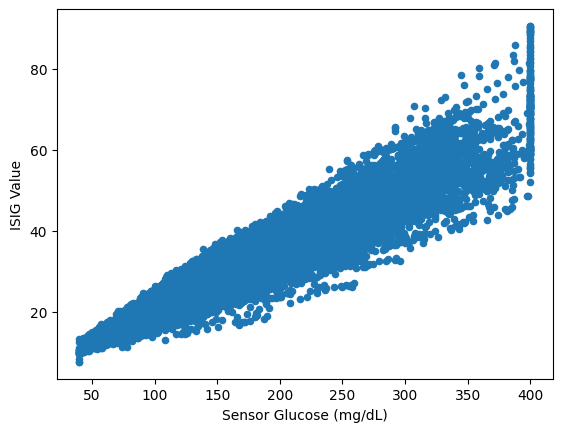

In [10]:

glucose.plot.scatter(x="Sensor Glucose (mg/dL)", y="ISIG Value")



Checking patient's media of the blood glucose value

       Sensor Glucose (mg/dL)
6380                      132
6381                      140
6382                      163
6383                      181
6384                      188
...                       ...
35770                     121
35771                     116
35772                     113
35773                     115
35774                     120

[27705 rows x 1 columns]


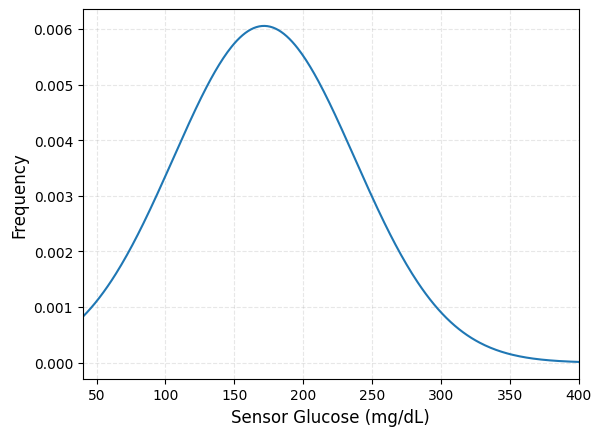

In [20]:
#get the gauss distribution of the glucose data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = glucose[["Sensor Glucose (mg/dL)"]]
print(df)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["Sensor Glucose (mg/dL)"])
df_std = np.std(df["Sensor Glucose (mg/dL)"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["Sensor Glucose (mg/dL)"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["Sensor Glucose (mg/dL)"].sort_values(), pdf)
plt.xlim([40,400])  
plt.xlabel("Sensor Glucose (mg/dL)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()